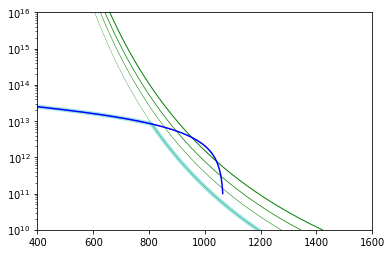

In [16]:
import numpy as np
from matplotlib import pyplot as plt

temp = np.linspace(400,1600,5000)
# High-stress version of B (Evans & Goetze 1979)
Rgas = 8.3145 # J/mol/K
eta0 = 5.7e11 # 1/s
sigma0 = 8.5e9 # Pa
Ha = 525.e3 # J/mol/K
n = 3.4
A_Mpa = 10.**3.3 # Jin 2001 eclogite, following Molnar & Garzione, Zieman
Q = 480.e3 # kJ/mol for eclogite

for e in np.array([1.e-14]):
    A = A_Mpa*(1e6)**(-n) # Pa^-3.4 s^-1
    F = 3.**(-(n+1.)/2./n)*(2)**(1./n) # converts imposed strain fields in lab to a general geometry

    B_HS = e**((n-1)/n) * sigma0 / (e*np.sqrt(3.0)) * (1. - np.sqrt((Rgas*temp)/(Ha) * np.log((np.sqrt(3.0)*eta0)/(2.0*e))) )
    B_HS[B_HS<1e11] = np.nan
    if(e==1e-14):
        for f in [0.1, 0.25, 0.5, 1]:
            B = f*F*(A)**(-1./n)*np.exp(Q/(n*Rgas*temp)) # Pa s = kg/m/s
            B_eff = np.minimum(B,B_HS)
            B_eff[temp>1000] = B[temp>1000]
            if f==0.1:
                plt.plot(temp,B_eff,'c',linewidth=4,alpha=0.4)
            plt.plot(temp,B,'g',linewidth=np.sqrt(f))
plt.plot(temp,B_HS,'b')
plt.gca().set_yscale("log")
plt.gca().set_ylim([1e10,1e16])
plt.gca().set_xlim([400,1600])
plt.savefig("output/viscosity_B.pdf")
plt.savefig("output/viscosity_B.png")